# NVIDIA Rapids Demo with DBSCAN

### DBSCAN is a density-based clustering algorithm that can automatically classify groups of data, without the user having to specify how many groups there are.

#### Density-based spatial clustering of applications with noise (DBSCAN)

##### Basic Idea: take a point in a dataset, draw a circle of radius $\varepsilon$ around it. If $N$ or more other points are within the circle, a group if formed. Build out the group by repeating the algo for the neighbors.

In [41]:
%matplotlib inline
import sys
sys.path.append('../common')
from plt_style import *
from sklearn.datasets import make_circles
import numpy
import cupy
import pandas as pd, numpy as np
import cudf
import os
import pylab as plt

In [42]:
X, y = make_circles(n_samples=int(2e5), factor=.35, noise=.05)
X *= 3

In [43]:
print(X.shape)
y

(200000, 2)


array([1, 1, 1, ..., 0, 1, 1])

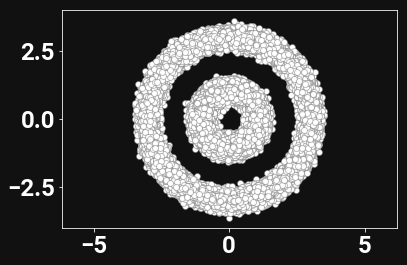

In [44]:
my_scatter(*X.T,c='w',edgecolor='#77777777')
_=plt.axis('equal')

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=2)

In [46]:
%%time
y_db = db.fit_predict(X)

CPU times: user 31.8 s, sys: 4.92 s, total: 36.7 s
Wall time: 36.6 s


In [47]:
print(f'Number of classifier errors: {sum(y_db-y)}')

Number of classifier errors: 0


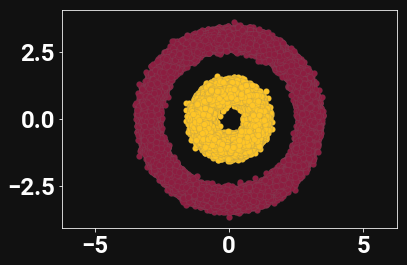

In [48]:
mask0,mask1 = y_db == 0, y_db==1
my_scatter(*X[mask0].T,c=gld,edgecolor='#77777722')
my_scatter(*X[mask1].T,c=mrn,edgecolor='#77777722')
_=plt.axis('equal')

In [49]:
X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gpu = cudf.DataFrame.from_pandas(X_df)

In [50]:
from cuml import DBSCAN as cumlDBSCAN
db_gpu = cumlDBSCAN(eps=0.6, min_samples=2)

In [51]:
%%time
y_db_gpu = db_gpu.fit_predict(X_gpu)

CPU times: user 2.14 s, sys: 1.34 s, total: 3.48 s
Wall time: 3.41 s


In [52]:
print(f'Number of classifier errors: {sum(y_db_gpu.values-y)}')

Number of classifier errors: 0


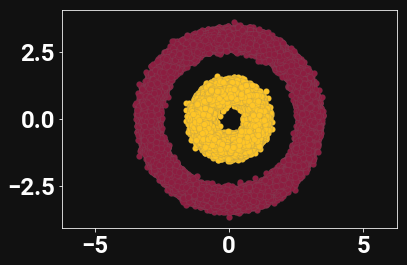

In [53]:
mask0,mask1 = y_db_gpu == 0, y_db_gpu==1
my_scatter(*X_gpu[mask0].as_matrix().T,c=gld,edgecolor='#77777722')
my_scatter(*X_gpu[mask1].as_matrix().T,c=mrn,edgecolor='#77777722')
_=plt.axis('equal')

![](./speedup.png)

https://towardsdatascience.com/heres-how-you-can-accelerate-your-data-science-on-gpu-4ecf99db3430